# Run the hand-made Perceptron class (with shuffled data)
------
### Import basic needed modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---
### Load and setup data/variables 
1\. Input Iris.data (.CSV) with *pandas* to be a dataframe (df)

In [2]:
df0 = pd.read_csv('iris.data', header=None)
print df0.tail()

       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica


In [3]:
# Optional : Shuffle order of data
df = df0.reindex(np.random.permutation(df0.index))
print df.tail()

      0    1    2    3                4
71  6.1  2.8  4.0  1.3  Iris-versicolor
21  5.1  3.7  1.5  0.4      Iris-setosa
39  5.1  3.4  1.5  0.2      Iris-setosa
33  5.5  4.2  1.4  0.2      Iris-setosa
84  5.4  3.0  4.5  1.5  Iris-versicolor


2\. Extract 100 data from dataframe df 
* No.4 colume to y
* No.0 & 2 columes to be X, with 2-D variables 

In [4]:
# Filling y and X
y0 = df0.iloc[0:100, 4].values
X0 = df0.iloc[0:100, [0,2]].values
y = df.iloc[0:100, 4].values
X = df.iloc[0:100, [0,2]].values
#print ("y :", y)
#print ("X :", X)

3\. Change the text to distigushable real rumber in y

In [5]:
y = np.where(y == 'Iris-setosa', -1, 1)

4\. Visualize the current distrubtion from data

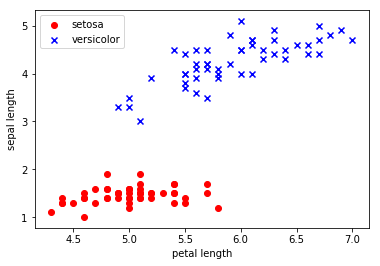

In [6]:
# Ploting : significance variables
plt.scatter(X0[:50, 0], X0[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X0[50:100, 0], X0[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

---
### Run hand-made Perceptron
1\. Import hand-made Perceptron class

In [7]:
from Perceptron import Perceptron

2\. Running percepton algorithm with 10 times iterations....

In [8]:
# Percpetron setting
ppn_10 = Perceptron(eta=0.1, n_iter=10)
ppn_10.fit(X,y)

3\. Finished and visualizing the misclassifications as function of iterations

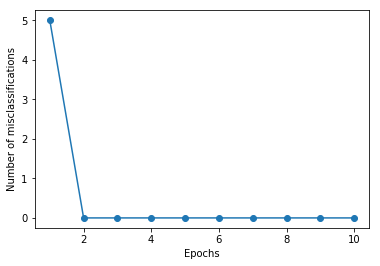

In [9]:
# Plotting
plt.plot
plt.plot(range(1, len(ppn_10.errors_) + 1), ppn_10.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [10]:
print 'weight w: '+str(ppn_10.w_)
print 'Activation function: %.2f + %.2f*x_1 + %.2f*x_2'%(ppn_10.w_[0], ppn_10.w_[1], ppn_10.w_[2])

weight w: [-0.2  -0.46  1.16]
Activation function: -0.20 + -0.46*x_1 + 1.16*x_2


---
### Visualize decision regions
Import hand-made funciton & plot

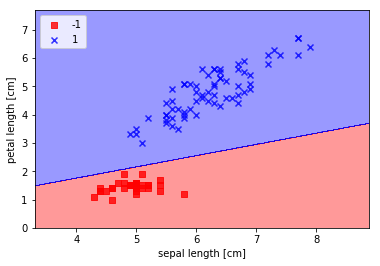

In [11]:
from plot_decision_regions import * 
plot_decision_regions( X, y, classifier=ppn_10, resolution=0.01 )
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

---
# Summary and observing evelotion of iteration
1\. Create each iterations' classifiers

In [12]:
#plt.figure(1)
ppn = []
for i in range(10):
    ppn.append(Perceptron(eta=0.1, n_iter=i+1))
    ppn[i].fit(X,y)
    
    #plt.subplot(2, 5, i+1)
    #plot_decision_regions( X, y, classifier=ppn[i] )
    #plt.xlabel('sepal length [cm]')
    #plt.ylabel('petal length [cm]')
    #plt.legend(loc='upper left')
#plt.show()

2\. define a function for plots

In [13]:
def plot_iter(n_iter):
    n_misc = ppn[n_iter-1].checkMisclassified(X, y)
    print 'weight :'+str(ppn[n_iter-1].w_)
    print 'errors (online): '+str(ppn[n_iter-1].errors_[n_iter-1])
    print 'misclass: '+str(n_misc)
    print ppn[n_iter-1].misc
    plot_decision_regions( X, y, classifier=ppn[n_iter-1] )
    plt.xlabel('sepal length [cm]')
    plt.ylabel('petal length [cm]')
    plt.legend(loc='upper left', title='Iter '+str(n_iter))
    plt.show()

weight :[-0.2  -0.46  1.16]
errors (online): 5
misclass: 0
[]


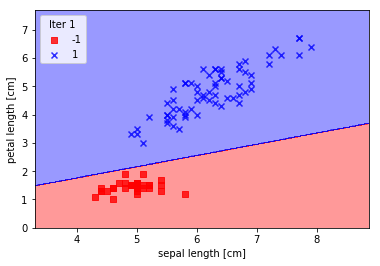

In [14]:
plot_iter(1)

weight :[-0.2  -0.46  1.16]
errors (online): 0
misclass: 0
[]


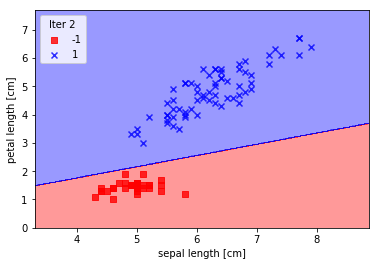

In [15]:
plot_iter(2)

weight :[-0.2  -0.46  1.16]
errors (online): 0
misclass: 0
[]


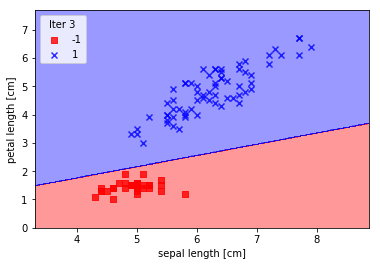

In [16]:
plot_iter(3)

weight :[-0.2  -0.46  1.16]
errors (online): 0
misclass: 0
[]


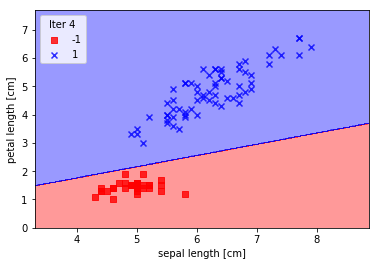

In [17]:
plot_iter(4)

weight :[-0.2  -0.46  1.16]
errors (online): 0
misclass: 0
[]


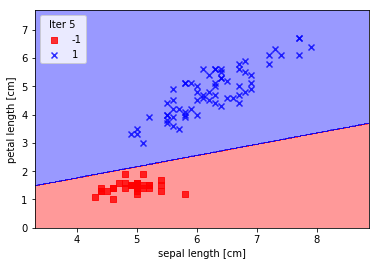

In [18]:
plot_iter(5)

weight :[-0.2  -0.46  1.16]
errors (online): 0
misclass: 0
[]


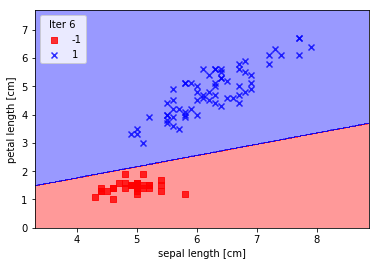

In [19]:
plot_iter(6)

weight :[-0.2  -0.46  1.16]
errors (online): 0
misclass: 0
[]


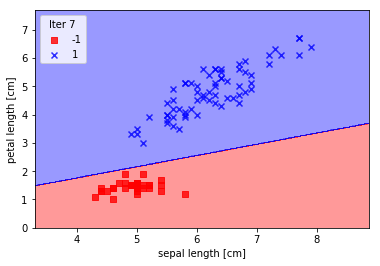

In [20]:
plot_iter(7)

weight :[-0.2  -0.46  1.16]
errors (online): 0
misclass: 0
[]


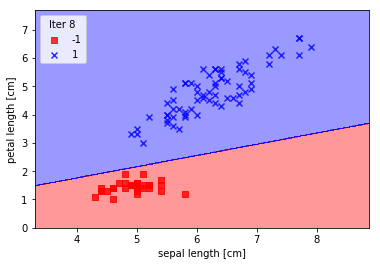

In [21]:
plot_iter(8)

weight :[-0.2  -0.46  1.16]
errors (online): 0
misclass: 0
[]


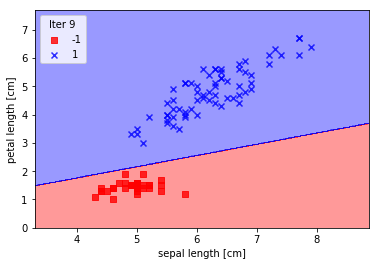

In [22]:
plot_iter(9)

weight :[-0.2  -0.46  1.16]
errors (online): 0
misclass: 0
[]


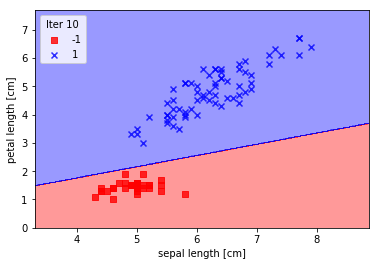

In [23]:
plot_iter(10)